# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas

import numpy as np
import pandas as pd

# Challenge 1 

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:
sensor.head()


attitude.roll  attitude.pitch  attitude.yaw  gravity.x  gravity.y  \
0       1.528132       -0.733896      0.696372   0.741895   0.669768   
1       1.527992       -0.716987      0.677762   0.753099   0.657116   
2       1.527765       -0.706999      0.670951   0.759611   0.649555   
3       1.516768       -0.704678      0.675735   0.760709   0.647788   
4       1.493941       -0.703918      0.672994   0.760062   0.647210   

   gravity.z  rotationRate.x  rotationRate.y  rotationRate.z  \
0  -0.031672        0.316738        0.778180        1.082764   
1  -0.032255        0.842032        0.424446        0.643574   
2  -0.032707       -0.138143       -0.040741        0.343563   
3  -0.041140       -0.025005       -1.048717        0.035860   
4  -0.058530        0.114253       -0.912890        0.047341   

   userAcceleration.x  userAcceleration.y  userAcceleration.z  
0            0.294894           -0.184493            0.377542  
1            0.219405            0.035846            0.114866  
2            0.010714            0.134701           -0.167808  
3           -0.008389            0.136788            0.094958  
4            0.199441            0.353996           -0.044299

Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# Your code here:

sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
attitude.roll         1751 non-null float64
attitude.pitch        1751 non-null float64
attitude.yaw          1751 non-null float64
gravity.x             1751 non-null float64
gravity.y             1751 non-null float64
gravity.z             1751 non-null float64
rotationRate.x        1751 non-null float64
rotationRate.y        1751 non-null float64
rotationRate.z        1751 non-null float64
userAcceleration.x    1751 non-null float64
userAcceleration.y    1751 non-null float64
userAcceleration.z    1751 non-null float64
dtypes: float64(12)
memory usage: 164.2 KB


How many rows and columns are in our data?

In [7]:
# Your code here:
sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [15]:
# Your code here:
sensor["date"]=pd.date_range(start = "1/1/2018 00:00:00", end = "1/1/2018 00:29:10", periods = len(sensor))

Assign the time series index to the dataframe's index.

In [18]:
# Your code here:

sensor.index = pd.DatetimeIndex(sensor.date, freq='infer')
sensor.head()

attitude.roll  attitude.pitch  attitude.yaw  gravity.x  \
date                                                                          
2018-01-01 00:00:00       1.528132       -0.733896      0.696372   0.741895   
2018-01-01 00:00:01       1.527992       -0.716987      0.677762   0.753099   
2018-01-01 00:00:02       1.527765       -0.706999      0.670951   0.759611   
2018-01-01 00:00:03       1.516768       -0.704678      0.675735   0.760709   
2018-01-01 00:00:04       1.493941       -0.703918      0.672994   0.760062   

                     gravity.y  gravity.z  rotationRate.x  rotationRate.y  \
date                                                                        
2018-01-01 00:00:00   0.669768  -0.031672        0.316738        0.778180   
2018-01-01 00:00:01   0.657116  -0.032255        0.842032        0.424446   
2018-01-01 00:00:02   0.649555  -0.032707       -0.138143       -0.040741   
2018-01-01 00:00:03   0.647788  -0.041140       -0.025005       -1.048717   
2018-01-01 00:00:04   0.647210  -0.058530        0.114253       -0.912890   

                     rotationRate.z  userAcceleration.x  userAcceleration.y  \
date                                                                          
2018-01-01 00:00:00        1.082764            0.294894           -0.184493   
2018-01-01 00:00:01        0.643574            0.219405            0.035846   
2018-01-01 00:00:02        0.343563            0.010714            0.134701   
2018-01-01 00:00:03        0.035860           -0.008389            0.136788   
2018-01-01 00:00:04        0.047341            0.199441            0.353996   

                     userAcceleration.z                Date  \
date                                                          
2018-01-01 00:00:00            0.377542 2018-01-01 00:00:00   
2018-01-01 00:00:01            0.114866 2018-01-01 00:00:01   
2018-01-01 00:00:02           -0.167808 2018-01-01 00:00:02   
2018-01-01 00:00:03            0.094958 2018-01-01 00:00:03   
2018-01-01 00:00:04           -0.044299 2018-01-01 00:00:04   

                                   date  
date                                     
2018-01-01 00:00:00 2018-01-01 00:00:00  
2018-01-01 00:00:01 2018-01-01 00:00:01  
2018-01-01 00:00:02 2018-01-01 00:00:02  
2018-01-01 00:00:03 2018-01-01 00:00:03  
2018-01-01 00:00:04 2018-01-01 00:00:04

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

<Figure size 5400x5400 with 0 Axes>

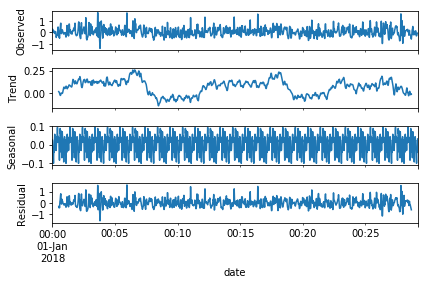

In [34]:
# Your code here:
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

ts = sensor[["userAcceleration.x"]]
dec = sm.tsa.seasonal_decompose(x=ts, freq = 60)

fig= plt.figure(figsize=(75,75))
dec.plot()
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

<Figure size 5400x5400 with 0 Axes>

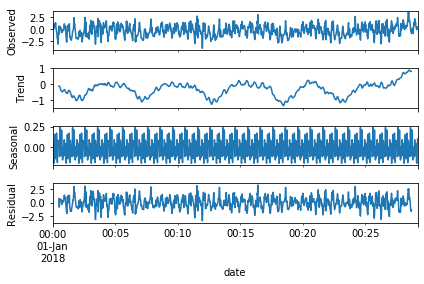

In [35]:
ts2 = sensor[["rotationRate.x"]]

dec2 = sm.tsa.seasonal_decompose(x=ts2, freq = 60)


fig= plt.figure(figsize=(75,75))
dec2.plot()
plt.show()

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [36]:
from statsmodels.tsa.stattools import adfuller

In [39]:
# Your code here:
stationaccel = adfuller(ts["userAcceleration.x"])[1]
stationrotation = adfuller(ts2["rotationRate.x"])[1]

print("Acceleration ADF:", stationaccel)
print("Rotation ADF:", stationrotation)

Acceleration ADF: 2.823439483037483e-30
Rotation ADF: 6.3202303359123905e-06


What are your conclusions from this test?

In [40]:
# Your conclusions here:
#Both of the variables are stationary